In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [21]:
transform = transforms.ToTensor() 


train_dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
class MyNN(nn.Module):
    #input layer -> fully connected layer -> fully connected layer -> output layer  (no activation functions because i dont see why, even tried relu but worse results...)
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), 28*28)  #make input vektors
        x = self.fc1(x)
        x = self.fc2(x)
        return x


model = MyNN()

In [37]:

optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        optimizer.zero_grad()   #reset gradients

        outputs = model(images)     #forward pass
        loss = criterion(outputs, labels)   #compute loss (chose CEL because we just learned about it in EleMlDs)

        loss.backward()  #backpropagation (calculate gradients)
        optimizer.step()    #update weights in negative gradient direction

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 2008.5410
Epoch 2, Loss: 1668.0798
Epoch 3, Loss: 1337.8330
Epoch 4, Loss: 1075.3840
Epoch 5, Loss: 894.4564


In [46]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 82.59%


torch.Size([1, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

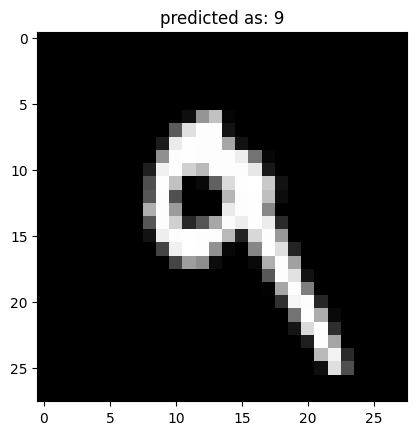

In [51]:
image , label = test_dataset[7]         #Quick visualisation 
print(image.shape)
model(image)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"predicted as: {label}")
plt.show